In [47]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch import utils
from torch import optim
from torch.utils.data.sampler import SubsetRandomSampler
from math import ceil

(1000,)
(1000, 2)


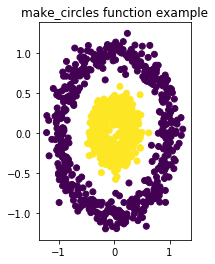

In [138]:
fig=plt.figure(1)
def data_generator(n_samples=1000):
    x1,y1 =datasets.make_circles(n_samples=n_samples, noise=0.1, random_state=1, factor=0.3)
    return x1, y1

x1, y1 = data_generator();

print(y1.shape)
print(x1.shape)

plt.subplot(121)  
plt.title('make_circles function example')  
plt.scatter(x1[:,0],x1[:,1],marker='o',c=y1) 

Loss: 0.49837151169776917
Loss: 0.008961069397628307
Loss: 0.000535511935595423


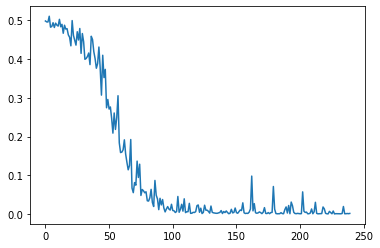

In [136]:
model = nn.Sequential(
    nn.Linear(2, 4),
    nn.ReLU(),
    nn.Linear(4, 8),
    nn.ReLU(),
    nn.Linear(8, 16),
    nn.ReLU(),
    nn.Linear(16, 1),
    nn.Sigmoid()
)


optimizer = optim.Adam(model.parameters(), lr=0.01)
loss_func = nn.L1Loss()

tensor_x = torch.FloatTensor(x1) # transform to torch tensors
tensor_y = torch.FloatTensor(y1)

epoch = 3
index = 0
losses = []
batch_size = 10

train_radio = 0.8
data_set_count = tensor_x.shape[0]
indices = list(range(data_set_count))
np.random.shuffle(indices)
split = int(np.floor(data_set_count * train_radio))
train_indices = indices[:split]
test_indices = indices[split:]

train_sampler = SubsetRandomSampler(train_indices)
test_sampler = SubsetRandomSampler(test_indices)

my_dataset = utils.data.TensorDataset(tensor_x,tensor_y) # create your datset
train_data = utils.data.DataLoader(my_dataset, batch_size=batch_size, sampler=train_sampler) 
test_data = utils.data.DataLoader(my_dataset, batch_size=batch_size, sampler=test_sampler) 


for _ in range(epoch):
    for data, label in train_data:
        optimizer.zero_grad()
        result = model(data)
#         print(result)
        label = label.unsqueeze(-1)
#         print(label)
        loss = loss_func(result, label)
#         print(loss)
        loss.backward()
        optimizer.step()
        
        if(index % 100 == 0):
            print("Loss: {}".format(loss.item()))
        losses.append(loss.item())
        index += 1
plt.plot(range(len(losses)), losses)
